# HIPPO for 2A Protease (2/?)

## Imports

In [1]:
%load_ext autoreload
# %pprint

In [2]:
%autoreload 2
from pathlib import Path
import molparse as mp
import hippo2 as hippo
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from pprint import pprint
import json
from rdkit import Chem

## Load the project

In [3]:
animal = hippo.HIPPO.from_pickle('pickles/2A_hits_v2p1.pickle')
# animal = hippo.HIPPO.from_pickle('pickles/2A_comps_restart.pickle')

path = pickles/2A_hits_v2p1.pickle 


In [4]:
animal.summary()

HIPPO(hippo2_test)                              
target_name = A71EV2A             
max_lead_time = 20 workdays       
max_bb_price = 100 $              
min_bb_quantity = 20 mg           
#compound_sets = 1                
#compounds = 38                   
#poses = 49                       
#tags = 4                         
                                                        
compound sets:                                      
CompoundSet("hits", #compounds=38, #poses=49)           
                                                        
tags:                                               
hits #compounds=37, #poses=49                           
Catalytic Site #compounds=0, #poses=7                   
P1 #compounds=0, #poses=5                               
P5 #compounds=0, #poses=1                               


## Load Syndirella outputs

In [5]:
syndirella_root = Path('/data/xchem-fragalysis/kfieseler/A71EV2A')

## Run add_elabs as a shell script

In [ ]:
#!./comps_shell.py -i 'pickles/2A_hits_v2p1.pickle' -o 'pickles/2A_comps_shell.pickle' -s '/data/xchem-fragalysis/kfieseler/A71EV2A'

path = pickles/2A_hits_v2p1.pickle          
root_path = /data/xchem-fragalysis/kfieseler/A71EV2A  
tags = ['Syndirella']                                 
Syndirella Synthetic Routes CSV                                     
routes_csv_pattern = routes_data/*.csv                
paths[#=0] = []                                       
Syndirella Elaborations CSVs                                        
elabs_csv_pattern = elabs/*/*/*/*.csv                 
minimised_mol_suffix = .minimised.mol                 
elabs_skip_prefix[#=2] = [., ~$]                      
elabs_skip_substr[#=1] = [_batch_]                    
elabs_skip_exact[#=1] = [output.csv]                  
#elab CSVs = 370                                      
>>> j=0/370                                                
                                                                                0m #elabs=0000170writing pickles/hippo2_test_comps_shell_restart.pickle ... 
[                                                 

In [46]:
!./comps_shell.py -i 'pickles/hippo2_test_comps_shell_restart.pickle' -o 'pickles/2A_comps_shell.pickle' -s '/data/xchem-fragalysis/kfieseler/A71EV2A' -r 324

path = pickles/hippo2_test_comps_shell_restart.pickle 
root_path = /data/xchem-fragalysis/kfieseler/A71EV2A  
tags = ['Syndirella']                                 
Syndirella Synthetic Routes CSV                                     
routes_csv_pattern = routes_data/*.csv                
paths[#=0] = []                                       
Syndirella Elaborations CSVs                                        
elabs_csv_pattern = elabs/*/*/*/*.csv                 
minimised_mol_suffix = .minimised.mol                 
elabs_skip_prefix[#=2] = [., ~$]                      
elabs_skip_substr[#=1] = [_batch_]                    
elabs_skip_exact[#=1] = [output.csv]                  
#elab CSVs = 370                                      
>>> j=324/370                                              
csv = /data/xchem-fragalysis/kfieseler/A71EV2A/elabs/1_step_dec7_batched/batch_2/steph_fragnetv2_PV-002862252644/steph_fragnetv2_PV-002862252644_1_of_1_step_26729.csv 
                             

In [47]:
animal = hippo.HIPPO.from_pickle('pickles/hippo2_test_comps_shell_restart.pickle')

path = pickles/hippo2_test_comps_shell_restart.pickle 


In [48]:
print(animal.num_compounds)
animal.compounds[-1]

73540


Compound(steph-fragnetv2-Z2852444229-1-of-1-step-05134, COc1nn(C2CCCC2)c(NC(=O)C(Br)C(C)C(F)(F)F)c1-c1ccccc1, #poses=2)

In [ ]:
from hippo2.cset import CompoundSet

print('getting bases')
if 'bases' in animal.compound_sets:
    animal.compound_sets['bases'] = animal.get_compounds('base')
else:
    bases = CompoundSet('bases', animal.get_compounds('base'))
    animal.compound_sets.append(bases)
print(animal.bases)

print('getting elabs')
if 'elabs' in animal.compound_sets:
    animal.compound_sets['elabs'] = animal.get_compounds('elab')
else:
    elabs = CompoundSet('elabs', animal.get_compounds('elab'))
    animal.compound_sets.append(elabs)
print(animal.elabs)

animal._update_bb_amounts(debug=True)

animal.write_pickle('pickles/2A_HIPPO_comps_final.pickle')

getting bases
CompoundSet("bases", #compounds=371, #poses=778)
getting elabs
CompoundSet("elabs", #compounds=73131, #poses=242040)
>>> getting Syndirella compounds       
#syndirella_comps = 73502         
[############                                     ]  26.12%

In [15]:
assert animal.num_compounds == len(animal.get_compounds('Syndirella')) + len(animal.hits)
print(animal.num_compounds)
print(animal.elabs)

5450
CompoundSet("elabs", #compounds=5386, #poses=7124)


In [16]:
dog = hippo.HIPPO.from_pickle(f'pickles/2A_comps_{test:03}set_v2p1.pickle')
print(dog.num_compounds)
print(dog.get_compounds('elab'))
dog.elabs

path = pickles/2A_comps_028set_v2p1.pickle 
5450
CompoundSet("elab in tags", #compounds=5386, #poses=7124)


CompoundSet("elabs", #compounds=5386, #poses=7124)

## Visualisation

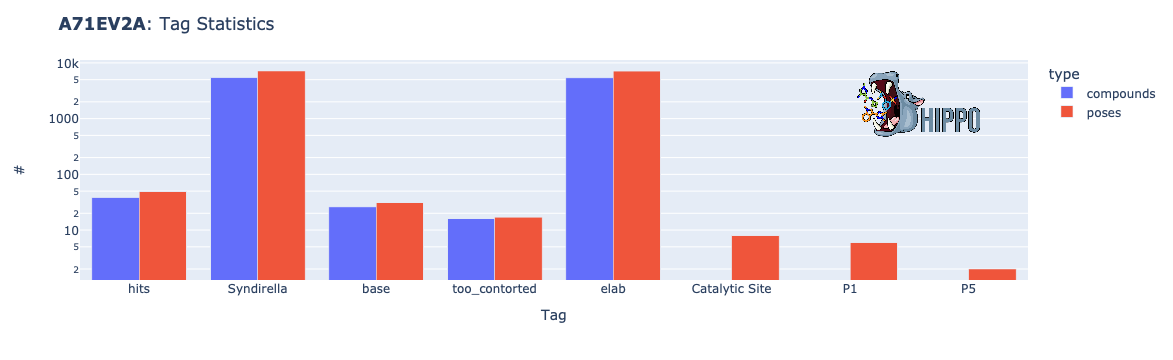

In [18]:
animal.plot_tag_statistics(log_y=True)

writing graphs/elabs_routes.html ...      Done.
writing graphs/elabs_routes.png ...       Done.


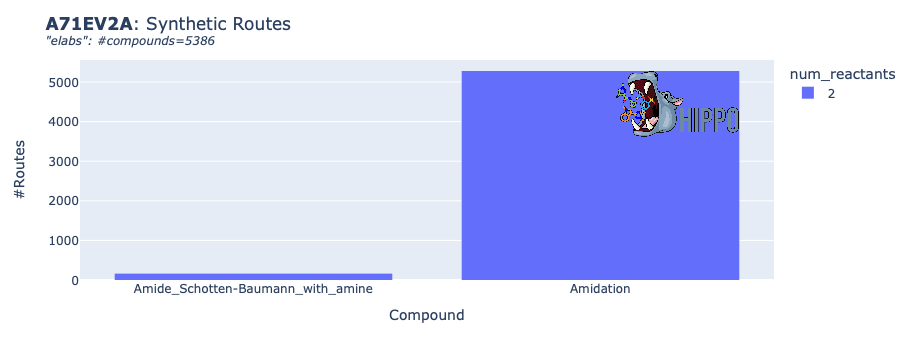

In [19]:
animal.plot_synthetic_routes(html='graphs/elabs_routes', png='graphs/elabs_routes')

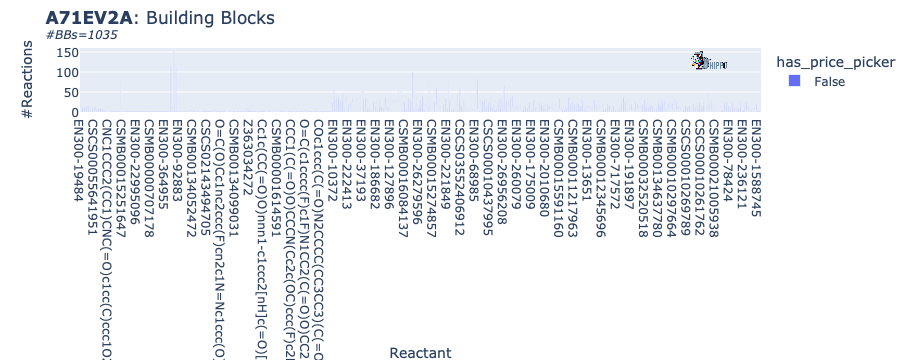

In [20]:
animal.plot_reactant_amounts()

In [21]:
#animal.plot_building_blocks(html='graphs/elabs_bbs', png='graphs/elabs_bbs')

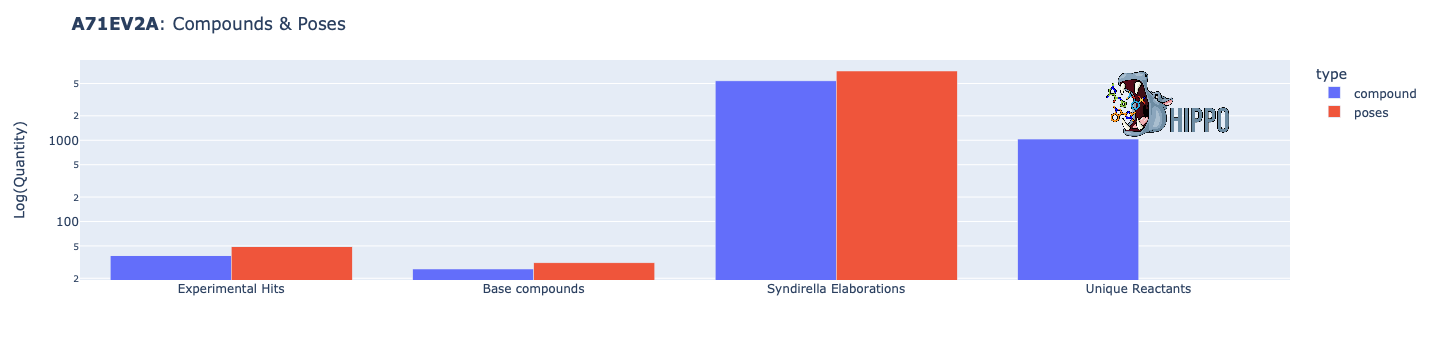

In [23]:
animal.plot_numbers()

## Random

In [14]:
raise Exception

Exception: 

In [40]:
df = pd.read_csv('/data/xchem-fragalysis/kfieseler/A71EV2A/elabs/1_step_dec6_batched/batch_1/matteo_ferla_rocs_cov_Z2737383535/matteo_ferla_rocs_cov_Z2737383535_1_of_1_step_10080.csv')

In [43]:
df = pd.read_csv('/data/xchem-fragalysis/kfieseler/A71EV2A/elabs/1_step_dec7_batched/batch_2/steph_fragnetv2_PV-002862252644/steph_fragnetv2_PV-002862252644_1_of_1_step_26729.csv')

In [ ]:
pprint(df[df['smi_reactant2'] == 'Cc1cccc2c1OC(C)(C)CNC2']['metadata_reactant2'].values[0])

In [ ]:
metadata_reactant1 = eval(df['metadata_reactant1'].values[0])

In [ ]:
metadata_reactant1

In [ ]:
print(json.dumps(df['metadata_reactant1'].values[0], indent=2))

In [ ]:
df[['name','smiles', 'smi_reactant1', 'smi_reactant2']].loc[20]

In [ ]:
df[['base_name']].values[0]

In [ ]:
sub.to_csv('test.csv')

In [45]:
df['name'].values

array(['steph-fragnetv2-PV-002862252644-1-of-1-step-base-A',
       'steph-fragnetv2-PV-002862252644-1-of-1-step-002862252644-A',
       'steph-fragnetv2-PV-002862252644-1-of-1-step-002862252644-A', ...,
       'steph-fragnetv2-PV-002862252644-1-of-1-step-002862252644-H',
       'steph-fragnetv2-PV-002862252644-1-of-1-step-002862252644-A',
       'steph-fragnetv2-PV-002862252644-1-of-1-step-002862252644-B'],
      dtype=object)

In [ ]:
animal.get_compounds('Syndirella')

In [ ]:
animal.compounds

In [ ]:
elab = animal.elabs[0]
elab.summary()

In [ ]:
elab.mol

In [ ]:
for elab in animal.elabs:
    if elab.num_poses > 1:
        for p in elab.poses:
            p.summary()
        break

In [ ]:
p.longname

In [ ]:
mp.rdkit.draw_mols([p.mol for p in elab.poses])

In [ ]:
print(animal.elabs)

In [ ]:
# for i,c in enumerate(animal.elabs):
    # print(i, c.name, animal.elabs.names.count(c.name), animal.elabs.smiles.count(c.smiles))
